In [35]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# libraries for tuning hyperparameters
from sklearn.model_selection import GridSearchCV , KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

# avoid errors
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### 1.EDA

In [3]:
df.shape

(517, 31)

In [4]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
# Checking the duplicate values
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
# Dropping the duplicate rows
df1 = df.drop_duplicates()
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
df1.shape

(509, 31)

In [9]:
df2 = df1.drop(df1.columns[10:30], axis= 1)
df2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small


In [10]:
df2.shape

(509, 11)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  size_category  509 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 47.7+ KB


In [12]:
# Convert the categorical vlues of size_category to integer

label_encoder = preprocessing.LabelEncoder()
df2['size_category'] = label_encoder.fit_transform(df2['size_category'])


In [13]:
# Converting categorical values into integers: Days and months
df2.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
df2.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [14]:
df2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


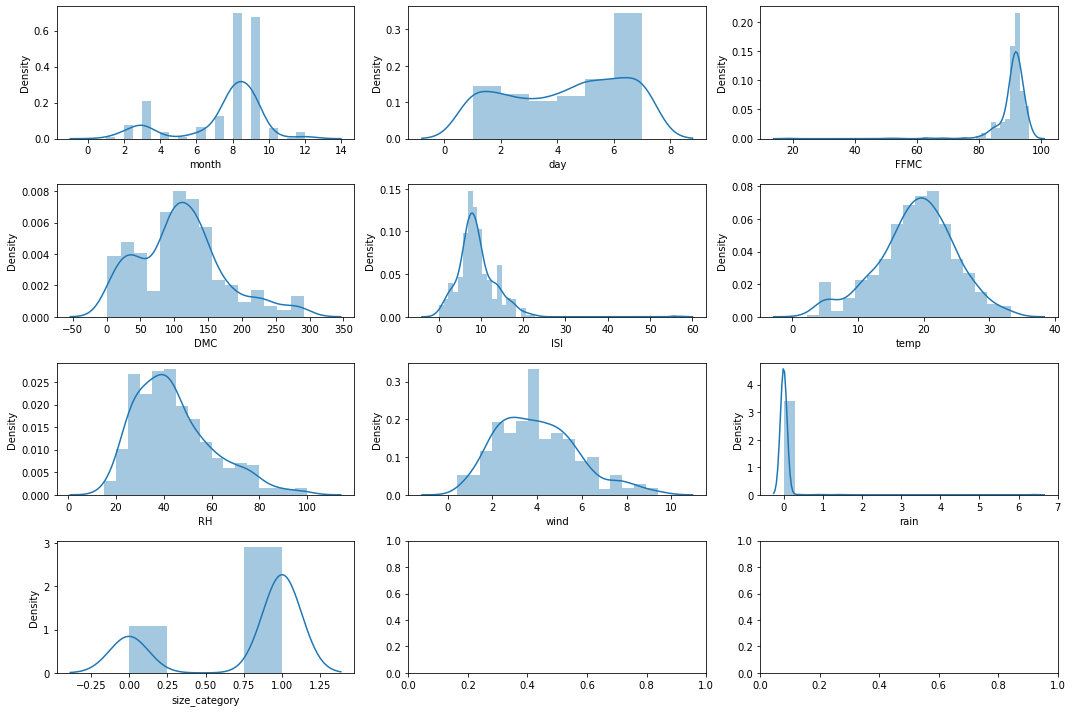

In [15]:
# Visualization:

fig,ax =plt.subplots (4,3, figsize = (15,10))
sns.distplot(df2.month, ax = ax[0,0])
sns.distplot(df2.day, ax = ax[0,1])
sns.distplot(df2.FFMC, ax = ax[0,2])
sns.distplot(df2.DMC, ax = ax[1,0])
sns.distplot(df2.ISI, ax = ax[1,1])
sns.distplot(df2.temp, ax = ax[1,2])
sns.distplot(df2.RH, ax = ax[2,0])
sns.distplot(df2.wind, ax = ax[2,1])
sns.distplot(df2.rain, ax = ax[2,2])
sns.distplot(df2.size_category, ax = ax[3,0])

plt.tight_layout()
plt.show()

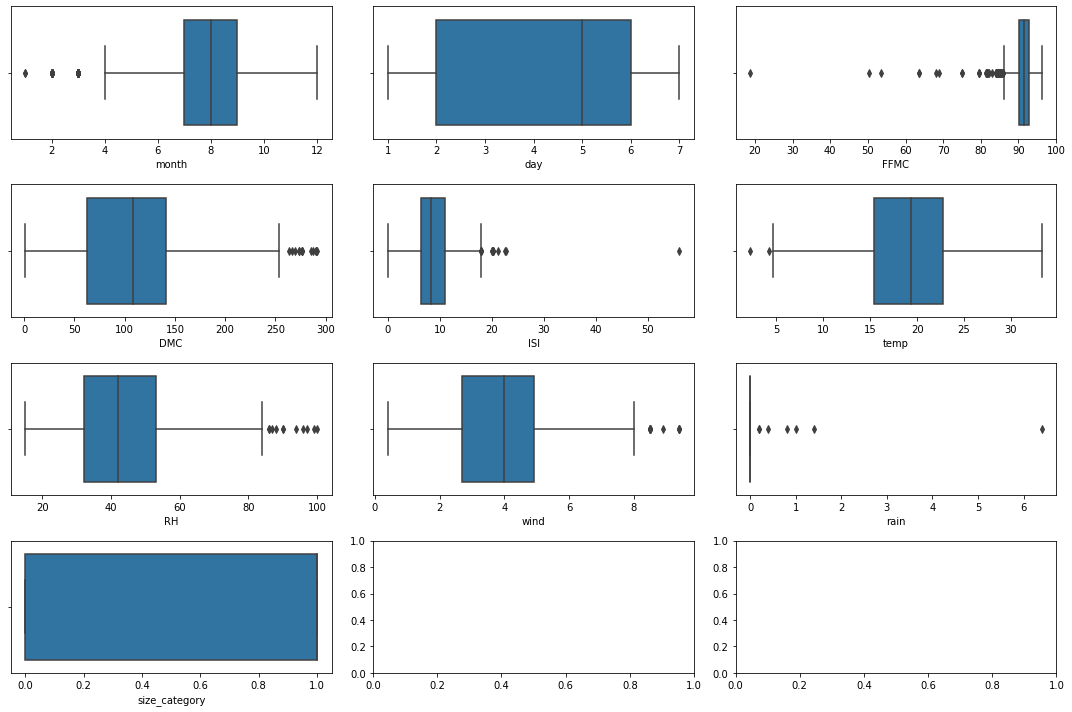

In [16]:
# Checking the outliers:

fig,ax =plt.subplots (4,3, figsize = (15,10))
sns.boxplot(df2.month, ax = ax[0,0])
sns.boxplot(df2.day, ax = ax[0,1])
sns.boxplot(df2.FFMC, ax = ax[0,2])
sns.boxplot(df2.DMC, ax = ax[1,0])
sns.boxplot(df2.ISI, ax = ax[1,1])
sns.boxplot(df2.temp, ax = ax[1,2])
sns.boxplot(df2.RH, ax = ax[2,0])
sns.boxplot(df2.wind, ax = ax[2,1])
sns.boxplot(df2.rain, ax = ax[2,2])
sns.boxplot(df2.size_category, ax = ax[3,0])

plt.tight_layout()
plt.show()


#### Observing the nature of data --> needs to be standardize

In [17]:
# Standardizing the data

scale = MinMaxScaler()
df2 = pd.DataFrame(scale.fit_transform(df2))
df2

,0,1,2,3,4,5,6,7,8,9,10
0,0.181818,0.666667,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,1.0
1,0.818182,0.166667,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,1.0
2,0.818182,0.833333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,1.0
3,0.181818,0.666667,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,1.0
4,0.181818,1.000000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
504,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.0
505,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.0
506,0.636364,1.000000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.0
507,0.636364,0.833333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,1.0


### 2. Extracting the independant and dependant variables:

In [18]:
X = df2.iloc[:, 0:10].values
Y = df2.iloc[:,-1].values

In [19]:
X

array([[0.18181818, 0.66666667, 0.87096774, ..., 0.42352941, 0.7       ,
        0.        ],
       [0.81818182, 0.16666667, 0.92774194, ..., 0.21176471, 0.05555556,
        0.        ],
       [0.81818182, 0.83333333, 0.92774194, ..., 0.21176471, 0.1       ,
        0.        ],
       ...,
       [0.63636364, 1.        , 0.8116129 , ..., 0.64705882, 0.7       ,
        0.        ],
       [0.63636364, 0.83333333, 0.97677419, ..., 0.31764706, 0.4       ,
        0.        ],
       [0.90909091, 0.16666667, 0.78451613, ..., 0.18823529, 0.45555556,
        0.        ]])

In [20]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
# Setting certain fix value of random seed for reproductibility

seed =7
np.random.seed(seed)

### 3.Model Building

#### 3.1 Create model

In [22]:
model = Sequential()
model.add(Dense(12,input_dim = 10, kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dense(8, kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform',activation = 'linear'))

#### 3.2 Compile the model

In [23]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#### 3.3 Fit the model

In [24]:
model.fit(X,Y, validation_split = 0.33, epochs = 100, batch_size = 10)

Epoch 1/100
35/35 [==============================] - 1s 8ms/step - loss: 0.7322 - accuracy: 0.2434 - val_loss: 0.6256 - val_accuracy: 0.3274
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.2434 - val_loss: 0.5643 - val_accuracy: 0.3274
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.2434 - val_loss: 0.4672 - val_accuracy: 0.3274
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.2434 - val_loss: 0.3374 - val_accuracy: 0.3274
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.3431 - val_loss: 0.2399 - val_accuracy: 0.5952
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.7126 - val_loss: 0.2409 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1912 - accuracy: 0.7566 - val_loss: 0.2484 - val_accuracy: 0.6726
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1838 - accuracy: 0.7566 - val_loss: 0.2412 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.7566 - val_loss: 0.2423 - val_accuracy: 0.6726
Epoch 61/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.7566 - val_loss: 0.2395 - val_accuracy: 0.6726
Epoch 62/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.7566 - val_loss: 0.2434 - val_accuracy: 0.6726
Epoch 63/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.7566 - val_loss: 0.2438 - val_accuracy: 0.6726
Epoch 64/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.7566 - val_loss: 0.2401 - val_accuracy: 0.6726
Epoch 65/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.7566 - val_loss: 0.2438 - val_accuracy: 0.6726
Epoch 

#### 3.4 Evaluate the model

In [26]:
scores = model.evaluate(X,Y)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 997us/step - loss: 0.2005 - accuracy: 0.7289
accuracy: 72.89%


#### 3.5 Getting the history

In [27]:
history = model.fit(X,Y,validation_split = 0.33,epochs = 100, batch_size = 10)

Epoch 1/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.7566 - val_loss: 0.2435 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.7566 - val_loss: 0.2417 - val_accuracy: 0.6726
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1802 - accuracy: 0.7566 - val_loss: 0.2443 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.7566 - val_loss: 0.2414 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.7566 - val_loss: 0.2434 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1795 - accuracy: 0.7566 - val_loss: 0.2409 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.7566 - val_loss: 0.2431 - val_accuracy: 0.6726
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1780 - accuracy: 0.7713 - val_loss: 0.2425 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.7713 - val_loss: 0.2485 - val_accuracy: 0.6726
Epoch 61/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1766 - accuracy: 0.7713 - val_loss: 0.2491 - val_accuracy: 0.6726
Epoch 62/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.7713 - val_loss: 0.2522 - val_accuracy: 0.6726
Epoch 63/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.7713 - val_loss: 0.2447 - val_accuracy: 0.6726
Epoch 64/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.7713 - val_loss: 0.2497 - val_accuracy: 0.6726
Epoch 65/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.7713 - val_loss: 0.2494 - val_accuracy: 0.6726
Epoch 

#### 3.6 Visualizing the history --> for accuracy and loss

In [30]:
#list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

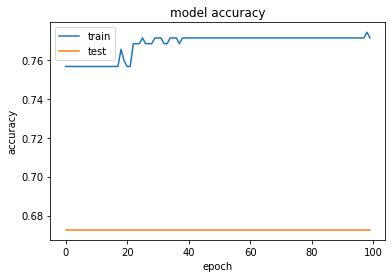

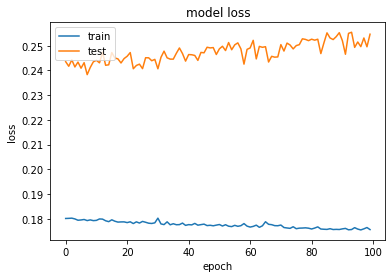

In [31]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4. Tuning of Hyperparameters --> Batch size and Epochs

#### 4.1 Create the model

In [33]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
    
    adam =Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [36]:
# Create the model
model = KerasClassifier(build_fn = create_model, verbose = 0)

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size, epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(), verbose =10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   7.5s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.765 total time=   2.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.510 total time=   2.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.676 total time=   2.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.693 total time=   2.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.510 total time=   6.7s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.676 total time=   5.7s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.663 total time=   5.0s


In [37]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{}, {} with :{}'. format(mean, stdev, param))

Best : 0.728809940814972, using {'batch_size': 10, 'epochs': 10}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 10, 'epochs': 10}
0.7228693485260009, 0.16102298906717666 with :{'batch_size': 10, 'epochs': 50}
0.7228693485260009, 0.16102298906717666 with :{'batch_size': 10, 'epochs': 100}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 20, 'epochs': 10}
0.720889151096344, 0.16180155509998204 with :{'batch_size': 20, 'epochs': 50}
0.720889151096344, 0.16180155509998204 with :{'batch_size': 20, 'epochs': 100}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 40, 'epochs': 10}
0.728809940814972, 0.1592563941055272 with :{'batch_size': 40, 'epochs': 50}
0.7228693485260009, 0.16102298906717666 with :{'batch_size': 40, 'epochs': 100}
